Generar data de ejemplo

In [3]:
import pandas as pd
import numpy as np

# Configuración para reproducibilidad
np.random.seed(42)

# Generar 1000 muestras de datos de inmuebles
n_samples = 1000

data = {
    'area_m2': np.random.normal(90, 30, n_samples).astype(int),
    'habitaciones': np.random.randint(1, 6, n_samples),
    'banos': np.random.randint(1, 4, n_samples),
    'ubicacion': np.random.choice(['Centro', 'Norte', 'Sur', 'Este', 'Oeste'], n_samples),
    'antiguedad': np.random.randint(0, 50, n_samples),
    'piscina': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    'garaje': np.random.choice([0, 1], n_samples, p=[0.4, 0.6]),
}

# Calcular precio base y agregar ruido
data['precio'] = (
    data['area_m2'] * 1000 + 
    data['habitaciones'] * 50000 + 
    data['banos'] * 30000 + 
    (data['ubicacion'] == 'Centro') * 100000 +
    (5 - data['antiguedad'] / 10) * 20000 +
    data['piscina'] * 50000 +
    data['garaje'] * 30000 +
    np.random.normal(0, 50000, n_samples)
)

df = pd.DataFrame(data)
df.to_csv('../data/raw/inmuebles.csv', index=False)

 Exploratory Data Analysis - Datos de Inmueblez de Correlación')
plt.show()

   area_m2  habitaciones  banos ubicacion  antiguedad  piscina  garaje  \
0      104             4      3    Centro          16        0       1   
1       85             1      3     Norte          31        0       1   
2      109             3      1       Sur           8        0       0   
3      135             5      3     Norte          39        0       0   
4       82             3      3     Oeste          19        0       0   

          precio  
0  572406.161731  
1  242111.784546  
2  321629.822424  
3  478336.587703  
4  416225.924582  
           area_m2  habitaciones        banos   antiguedad      piscina  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     90.072000      3.045000     1.985000    24.366000     0.293000   
std      29.372258      1.424431     0.835148    14.283419     0.455366   
min      -7.000000      1.000000     1.000000     0.000000     0.000000   
25%      70.000000      2.000000     1.000000    12.000000     0.0

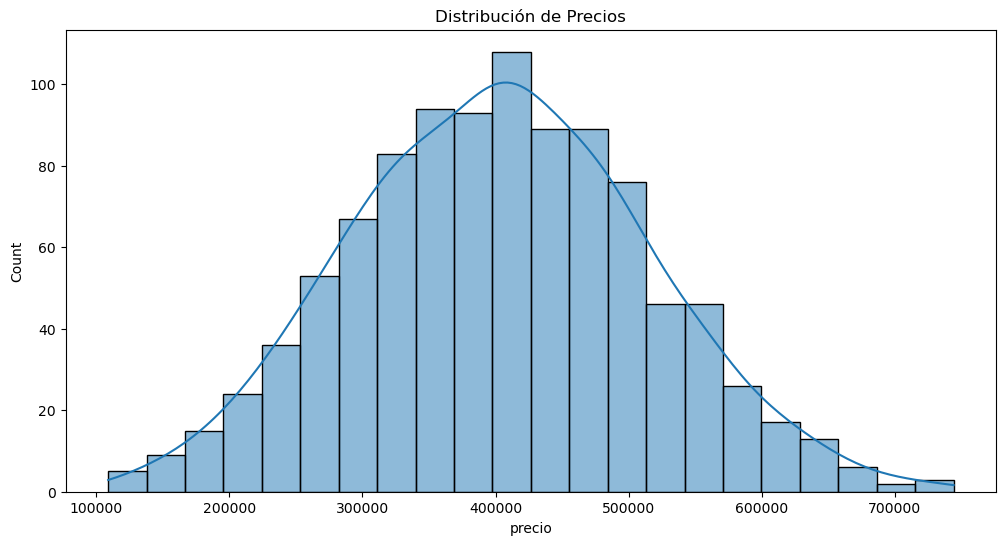

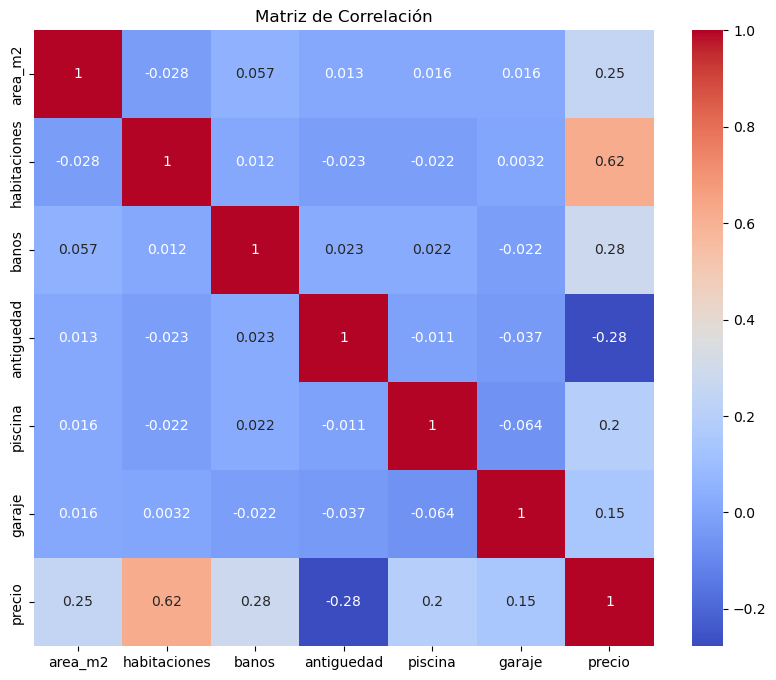

In [4]:
# Importamos librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/raw/inmuebles.csv')
print(df.head())

# %%
# Análisis estadístico básico
print(df.describe())

# %%
# Visualización de distribuciones
plt.figure(figsize=(12, 6))
sns.histplot(df['precio'], kde=True)
plt.title('Distribución de Precios')
plt.show()

# %%
# Correlaciones
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()